In [1]:
# !/usr/bin/env python
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1.User case driven preprocessing
# import the data
file_path="D:/DA/melb_data.csv"
df = pd.read_csv(file_path, header=0)
# check data dimensions
df.shape 

(13580, 21)

In [3]:
# check the first 3 rows of data
df.head(3)   # default 5

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019


In [4]:
# Attributes(including features and the target (class))
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
# null data and rate
df.isnull().sum().sort_values(ascending=False)   #df.isnull().any(axis=0).sum()  4

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Propertycount       0
Date                0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Bedroom2            0
Distance            0
Postcode            0
Regionname          0
Bathroom            0
Landsize            0
Lattitude           0
Longtitude          0
Suburb              0
dtype: int64

In [6]:
na_count = df.isnull().sum().sort_values(ascending=False)
na_rate = na_count / len(df)
na_data = pd.concat([na_count,na_rate],axis=1,keys=['count','ratio'])
na_data.head(4)      

,count,ratio
BuildingArea,6450,0.474963
YearBuilt,5375,0.395803
CouncilArea,1369,0.100810
Car,62,0.004566


In [7]:
# the target (class)
df['Price'].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A354F6B388>,
      dtype=object)

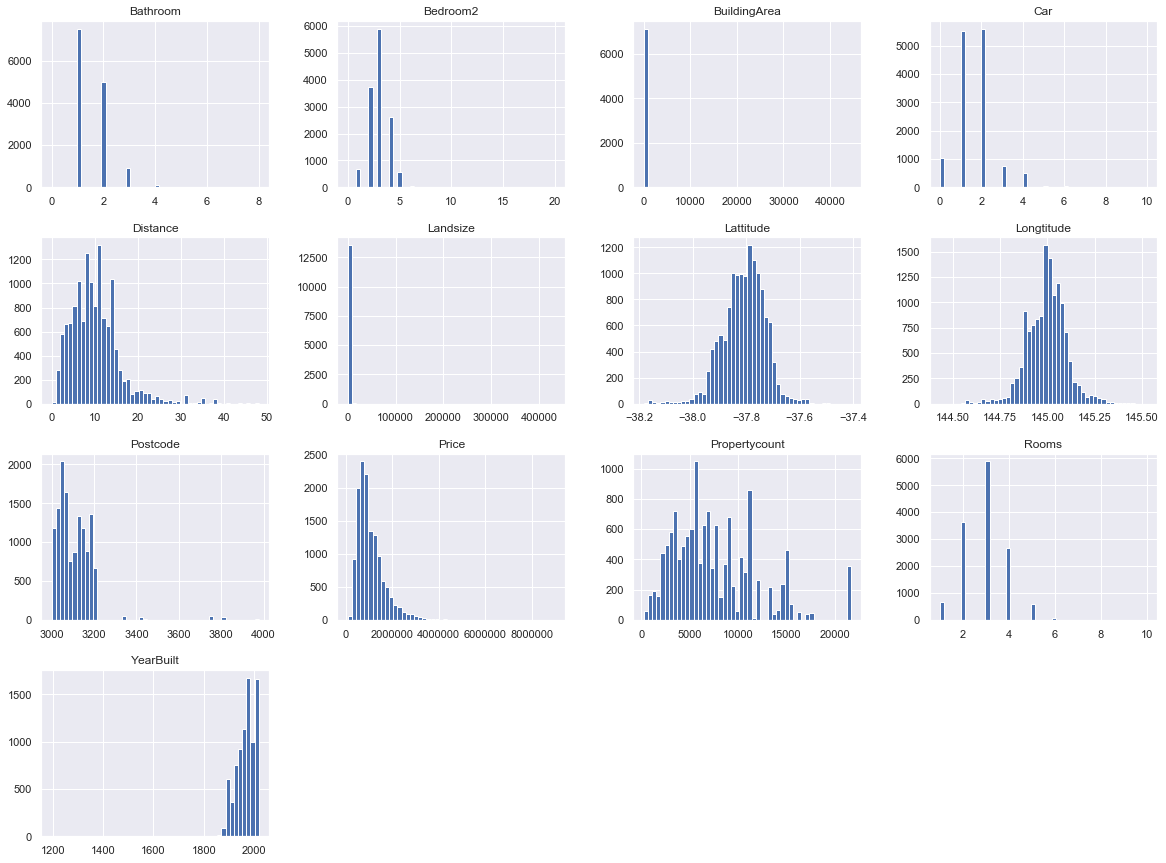

In [79]:
# the distribution of each numerical feature  
df.hist(bins=50,figsize=(20,15))

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


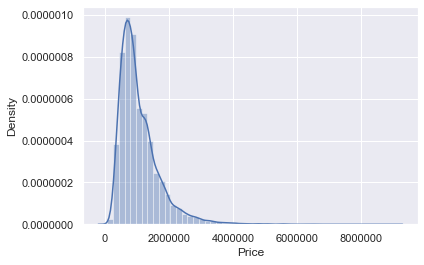

In [8]:
sns.set()
sns.distplot(df['Price'])

In [9]:
print("The Skewness is：{}".format(df['Price'].skew()))  # 偏度（Skewness）

The Skewness is：2.239624312529873


In [10]:
print("The Kurtosis is：{}".format(df['Price'].kurt()))  # 峰度(Kurtosis)

The Kurtosis is：9.87433888590604


In [11]:
df['Price'] = df['Price']//1000
df['Price']

0        1480
1        1035
2        1465
3         850
4        1600
         ... 
13575    1245
13576    1031
13577    1170
13578    2500
13579    1285
Name: Price, Length: 13580, dtype: int64

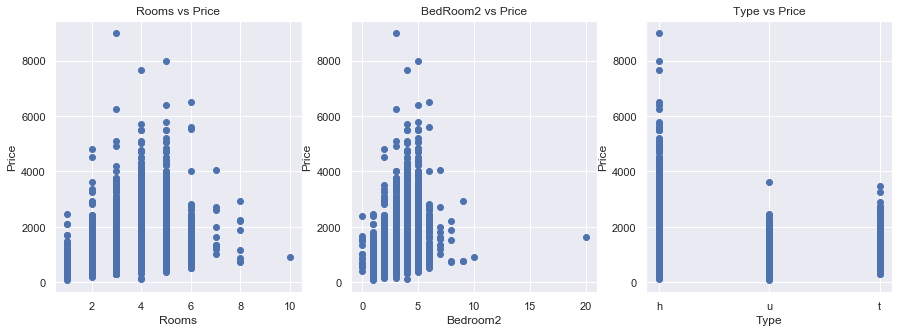

In [12]:
# Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
#        'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
#        'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
#        'Longtitude', 'Regionname', 'Propertycount'],
#       dtype='object')

sns.set(style='darkgrid')

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(x=df['Rooms'], y=df['Price'])
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Rooms vs Price')
plt.subplot(1, 3, 2)
plt.scatter(x=df['Bedroom2'], y=df['Price'])
plt.xlabel('Bedroom2')
plt.ylabel('Price')
plt.title('BedRoom2 vs Price')
plt.subplot(1, 3, 3)
plt.scatter(x=df['Type'], y=df['Price'])
plt.xlabel('Type')
plt.ylabel('Price')
plt.title('Type vs Price')
plt.show()

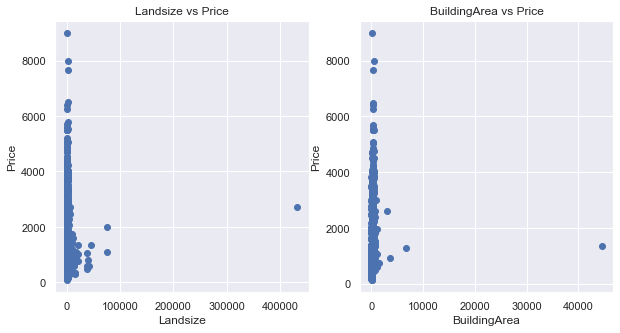

In [85]:
# check outliers
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.scatter(x=df['Landsize'], y=df['Price'])
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.title('Landsize vs Price')
plt.subplot(1, 2, 2)
plt.scatter(x=df['BuildingArea'], y=df['Price'])
plt.xlabel('BuildingArea')
plt.ylabel('Price')
plt.title('BuildingArea vs Price')
plt.show()

In [13]:
# delete outliers
df = df.drop(df[(df['Landsize']>40000) & (df['Price']<4000000)].index)
df = df.drop(df[(df['BuildingArea']>40000) & (df['Price']<2000000)].index)

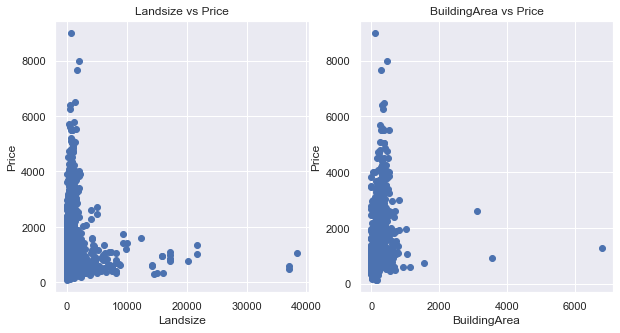

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.scatter(x=df['Landsize'], y=df['Price'])
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.title('Landsize vs Price')
plt.subplot(1, 2, 2)
plt.scatter(x=df['BuildingArea'], y=df['Price'])
plt.xlabel('BuildingArea')
plt.ylabel('Price')
plt.title('BuildingArea vs Price')
plt.show()

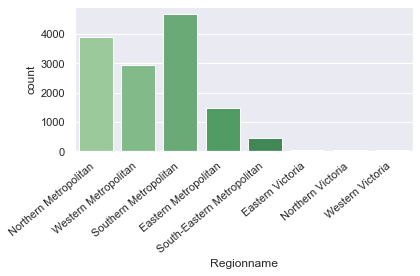

In [15]:
ax = sns.countplot(x="Regionname", data=df, palette="Greens_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

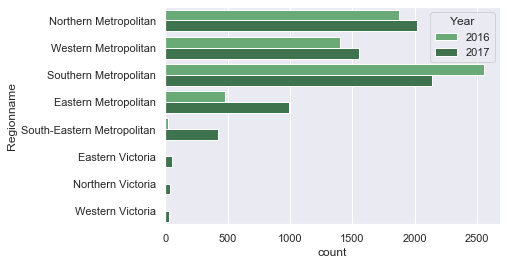

In [29]:
sns.countplot(y="Regionname", hue="Year", data=df, palette="Greens_d")
plt.show()

In [16]:
# 2.clean mal-formatted data
df['Date']= pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['Month']= df['Date'].dt.month
df['Year']= df['Date'].dt.year
df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year
0,Abbotsford,85 Turner St,2,h,1480,S,Biggin,2016-12-03,2.5,3067,...,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,12,2016
1,Abbotsford,25 Bloomburg St,2,h,1035,S,Biggin,2016-02-04,2.5,3067,...,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,2,2016
2,Abbotsford,5 Charles St,3,h,1465,SP,Biggin,2017-03-04,2.5,3067,...,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,3,2017


In [17]:
# 4.Delete correlated /non-useful columns
df.drop('Postcode', axis=1, inplace=True)  #non-useful columns
df.drop('Propertycount', axis=1, inplace=True) # correlated columns (Suburb & Propertycount)

In [18]:
df.shape

(13574, 21)

In [19]:
import calendar
df['Month_num'] = df['Month']
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [20]:
df_view_year_month_sale = df.groupby(['Year','Month_num','Month']).size().reset_index(name='count')

In [21]:
df_view_year_month_sale_2016 = df_view_year_month_sale.loc[df_view_year_month_sale['Year'] == 2016]

In [22]:
df_view_year_month_sale_2016

,Year,Month_num,Month,count
0,2016,1,Jan,2
1,2016,2,Feb,26
2,2016,4,Apr,317
3,2016,5,May,899
4,2016,6,Jun,732
5,2016,7,Jul,446
6,2016,8,Aug,715
7,2016,9,Sep,925
8,2016,10,Oct,551
9,2016,11,Nov,1114


In [23]:
df_view_year_month_sale_2017 = df_view_year_month_sale.loc[df_view_year_month_sale['Year'] == 2017]

In [24]:
df_view_year_month_sale_2017

,Year,Month_num,Month,count
11,2017,2,Feb,417
12,2017,3,Mar,678
13,2017,4,Apr,631
14,2017,5,May,1129
15,2017,6,Jun,1098
16,2017,7,Jul,1535
17,2017,8,Aug,833
18,2017,9,Sep,919


In [25]:
df_2016 = df.loc[(df['Year']== 2016)&(df['Month_num']>1)]
df_2017 = df.loc[df['Year']== 2017]

In [26]:
df_2016_by_month = df_2016[['Month_num','Price']].groupby(['Month_num'],as_index = False).median()
df_2017_by_month = df_2017[['Month_num','Price']].groupby(['Month_num'],as_index = False).median()

Text(0, 0.5, 'Price')

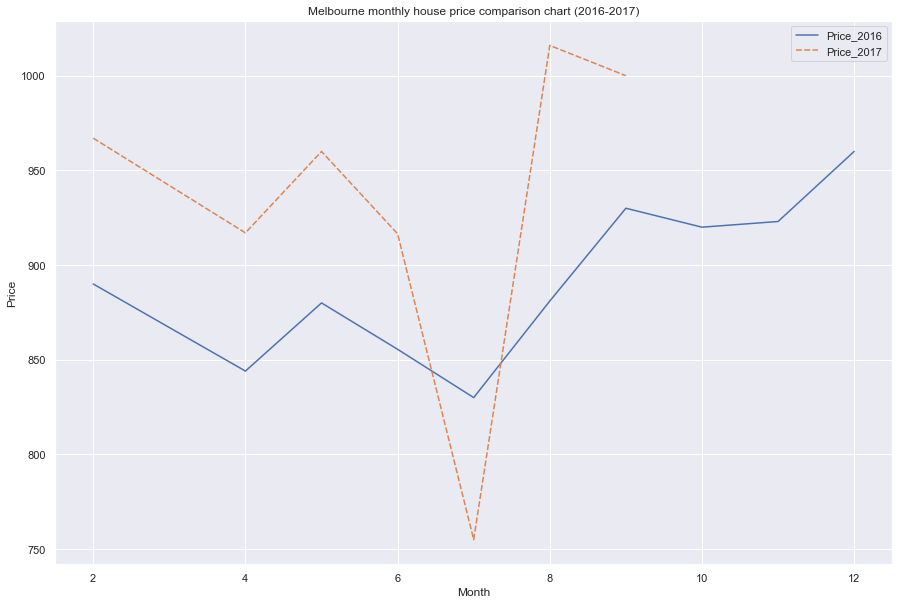

In [27]:
df_price_by_month = df_2016_by_month.merge(df_2017_by_month, on='Month_num',how='left',suffixes=('_2016', '_2017'))
df_price_by_month.set_index('Month_num',inplace=True)
figue,axs = plt.subplots(figsize = (15,10))
sns.lineplot(data=df_price_by_month)
axs.set_title('Melbourne monthly house price comparison chart (2016-2017)')
axs.set_xlabel('Month')
axs.set_ylabel('Price')

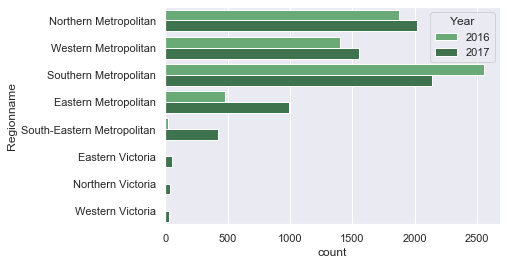